In [ ]:
import numpy
import pandas
import matplotlib.pyplot as plt
import scipy

16.1 Turussa kerrostalokaksioiden hinta keskustassa on tilastokeskuksen mukaan 225000 euroa. Ottamalla 15 asunnon otoksen, saadaan keskiarvoksi 221470 euroa ja keskihajonnaksi 6400 euroa. Selvitä Studentin 𝑡-jakaumaa käyttäen, voidaanko tilastokeskuksen keskiarvoon luottaa 95 % luottamustasolla. Voitaisiinko nollahypoteesi hyväksyä jos käytettäisiin keskiarvon 𝑧-testiä?

In [ ]:
## Code here

16.2 Mikä pitää keskihajonnan vähintään olla edellisen tehtävän tilanteessa, jotta voisimme luottaa tilastokeskuksen keskiarvoon 99 % luottamustasolla? Muiden lukujen odotetaan pysyvän samana ja käytetään keskiarvon 𝑡-testiä. Tehtävän voi ratkaista kokeilemalla. Mikä pitäisi keskiarvon vähintään olla? Muut luvut pysyisivät edelleen samana ja luottamustasona olisi 99 %.

In [ ]:
## Code here

16.3 Lukio-opettajien keskimääräisen palkan huhutaan olevan jopa 4000 euroa. Epäuskoinen lukio-opettaja, kuka tienaa paljon vähemmän, päättää testata tätä väitettä kysymällä 20 kollegansa palkan. Keskiarvoksi hän saa 3450 euroa ja keskihajonnaksi 630 euroa. Pitävätkö huhut paikkansa?

In [ ]:
## Code here

16.4 Lukiotaustaisten, ammattikoulutaustaisten ja peruskoulutaustaisten insinööriopiskelijoiden motivaatiota opintoja kohtaa päätettiin kartoittaa kyselytutkimuksella, jonka tulokset on taulukoitu alla olevaan frekvenssitaulukkoon. Laske taulukon vapausaste, jokaisen frekvenssin odotettu frekvenssi sekä khiin neliö -luku.
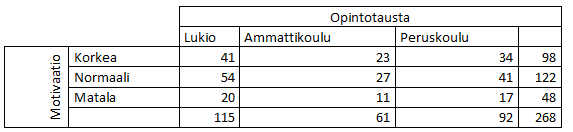

In [ ]:
## Code here

16.5 Onko edellisen tehtävän kyselyssä opiskelijan opintotausta selittävä tekijä opintomotivaatiolle? Voidaanko siis 95 % luottamustasolla sanoa, että tilastomuuttujat ”opintotausta” ja ”motivaatio” ovat riippumattomia? Laske tämä 𝜒2-riippumattomuustestillä.

In [ ]:
## Code here

16.6 Lääkkeiden tehoa testataan yleensä kaksoissokkotutkimuksilla, joissa toiselle ryhmälle annetaan oikeaa lääkettä ja toiselle ryhmälle lumetuotetta, joka ei sisällä ollenkaan lääkettä. Kohdehenkilö ja lääkkeen annostelija ei kumpikaan tiedä kumpaa ainetta henkilö sai. Tämän jälkeen tarkkaillaan saavatko kummatkin ryhmät oireita samalla tavalla, eli onko lääkkeen antamisella oikeasti vaikutusta sairastumiseen. Mikäli näillä muuttujilla on riippuvuus toisistaan, lääkkeellä on oikeasti tehoa. Alla olevassa taulukossa on erään lääkkeen kaksoissokkotutkimuksen tulokset ryhmittäin. Laske 𝜒2-riippumattomuustestillä onko lääkkeellä oikeasti vaikutusta, ja jos on niin millaista? Luottamustasona voidaan käyttää 95 %.
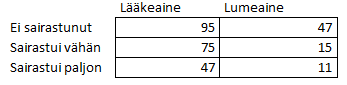

In [ ]:
## Code here